In [230]:
import glob
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

from tensorflow import keras

from sklearn.model_selection import train_test_split

In [231]:
instrument_Names = ['guitar','sexophone']

In [232]:
train = []
target = []

In [233]:
for name in instrument_Names:
    for image in sorted(glob.glob('../../Data/%sresize/*.jpg'%name)):
        img = Image.open(image)
        img = img.convert('L')
        train.append(img)
        target.append(name)

# train,test 만들기

In [234]:
x_train, x_test, y_train, y_test = train_test_split(
    train, target, test_size=0.2, random_state=42
)

In [235]:
trainData = np.zeros(len(x_train) * 100*100, dtype=np.int32).reshape(len(x_train), 100, 100)
testData = np.zeros(len(x_test) * 100*100, dtype=np.int32).reshape(len(x_test), 100, 100)

In [236]:
i = 0
for image in x_train:
    img = np.array(image, dtype=np.int32)
    trainData[i,:,:] = img
    i += 1

i = 0
for image in x_test:
    img = np.array(image, dtype=np.int32)
    testData[i,:,:] = img
    i += 1

In [237]:
print(trainData.shape)
print(testData.shape)

(32, 100, 100)
(8, 100, 100)


In [238]:
#data의 정규화
trainData=trainData.astype('float32')/255
testData=testData.astype('float32')/255

trainData=trainData.reshape((len(trainData),100*100))
testData=testData.reshape((len(testData),100*100))

In [239]:
print(trainData.shape)
print(testData.shape)

(32, 10000)
(8, 10000)


### Tensorflow Model 만들기

### Dense 수치와 epochs 수치만 조절하면된다. 
### shape가 100*100 이므로 Dense값도 어느정도 크게 입력을 해주는 것이 좋다.(100*100보다 작을 필요는 없다)
### 데이터가 적으면 epochs를 늘려서 학습을 더 시켜줘야한다.

In [240]:
# MNIST Data를 입력으로
InputModel=keras.layers.Input(shape=(100*100))

#EncoderLayer는 3차원으로 축소된 입력값
EncodedLayer=keras.layers.Dense(20000,activation='relu')(InputModel) 

# DecoderLayer는 MNIST 차원으로 복원된 값
DecoderLayer=keras.layers.Dense(100*100,activation='sigmoid')(EncodedLayer)

# AutoEncoderModel은 입력값과 복원값을 최소화 하는 과정
AutoencoderModel=keras.models.Model(InputModel,DecoderLayer)

ResourceExhaustedError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[10000,20000] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:AddV2]

In [ ]:
AutoencoderModel.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
history=AutoencoderModel.fit(trainData,trainData,
                             batch_size=128, # 한번에 읽어들이는 데이터의 양. 작업 속도만 차이가 날 뿐 결과물은 차이가 없다.
                             epochs=1000,
                             shuffle=True,
                             validation_data=(testData,testData)
                             )

Epoch 1/1000


ResourceExhaustedError: Graph execution error:

Detected at node 'sub_10' defined at (most recent call last):
    File "c:\Users\my\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\my\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\my\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\my\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\my\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\my\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\my\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\my\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\my\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\my\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\my\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\my\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\my\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\my\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\my\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\my\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "c:\Users\my\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "c:\Users\my\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\my\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\my\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\my\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13388\1148479964.py", line 1, in <module>
      history=AutoencoderModel.fit(trainData,trainData,
    File "c:\Users\my\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\my\anaconda3\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\my\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "c:\Users\my\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\my\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "c:\Users\my\anaconda3\lib\site-packages\keras\engine\training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\my\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "c:\Users\my\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "c:\Users\my\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "c:\Users\my\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "c:\Users\my\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "c:\Users\my\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1213, in apply_grad_to_update_var
      return self._update_step(grad, var)
    File "c:\Users\my\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 224, in _update_step
      self.update_step(gradient, variable)
    File "c:\Users\my\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\adam.py", line 194, in update_step
      m.assign_add((gradient - m) * (1 - self.beta_1))
Node: 'sub_10'
OOM when allocating tensor with shape[20000,10000] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node sub_10}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_45592]

In [ ]:
DecodedDigits=AutoencoderModel.predict(testData)

1/1 [==============================] - 0s 59ms/step


In [ ]:
# testData와 DecodedDigits의 크기
print(testData.shape)
print(DecodedDigits.shape)

(8, 10000)
(8, 10000)


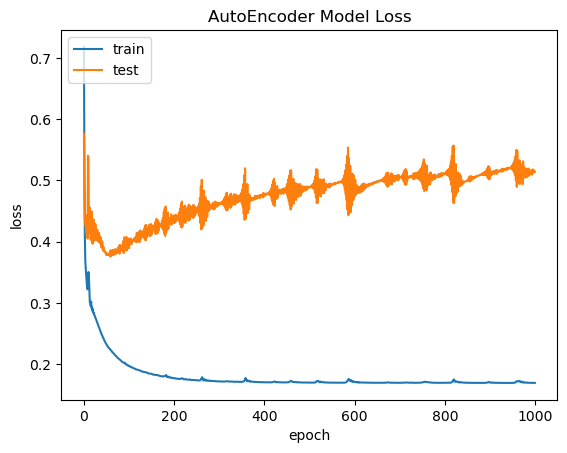

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('AutoEncoder Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

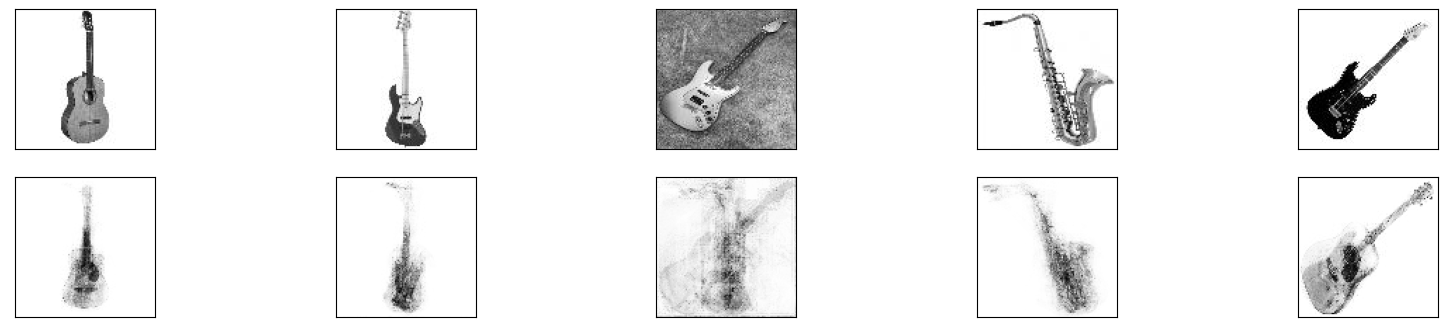

In [ ]:
# 10개의 이미지를 시각화
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(testData[i].reshape(100,100))
    ax.get_xaxis().set_visible(False)#축 안보여주겠다.
    ax.get_yaxis().set_visible(False)#축 안보여주겠다.
    plt.gray()
    #-----------------
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(DecodedDigits[i].reshape(100,100))
    ax.get_xaxis().set_visible(False)#축 안보여주겠다.
    ax.get_yaxis().set_visible(False)#축 안보여주겠다.
    plt.gray()
plt.show()#위에가 원본 데이터 밑에가 압축되어 나온 데이터이다. data size가 줄어든 것을 확인할 수 있다.